In [5]:
import time, datetime
import requests 
import pickle as pkl 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import json

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
import time
from sklearn.model_selection import ShuffleSplit

import itertools

import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import train_test_split

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from scipy import stats
import pprint
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [6]:
'''
Step 1
preprocess data
'''

# Prepare data
# data = pd.read_csv("mts_june_10m_rh.csv", dtype='float').drop(['Unnamed: 0'], axis=1)

# X = data.drop(['cs'], axis=1)
# Y = data['cs']

data = pd.read_pickle(r'all_metrics_data_3h.pkl')
# data = pd.read_pickle(r'all_metrics_data_12h.pkl')

X = data.drop(['time', 'label', "txn_fail_num"], axis=1)
Y = data.label

# Preproces for PCA
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)

# Create PCA
pca = PCA(n_components = 0.95)
pca_df = pca.fit_transform(scaled_df)
pca.fit(X)

PCA(n_components=0.95)

In [13]:
correlation_txn_falure = {}

for label in X.columns:
    r,p = stats.pearsonr(X[label],Y)
    correlation_txn_falure[label] = (r,p)
            
    txn_falure_correlation = pd.DataFrame.from_dict(correlation_txn_falure, orient='index').rename(columns={0:'r', 1:'p-value'}).sort_values('r', ascending=False)
           
    df_index = list(txn_falure_correlation.index)

    txn_falure_correlation = txn_falure_correlation.dropna(axis='rows')

<AxesSubplot:>

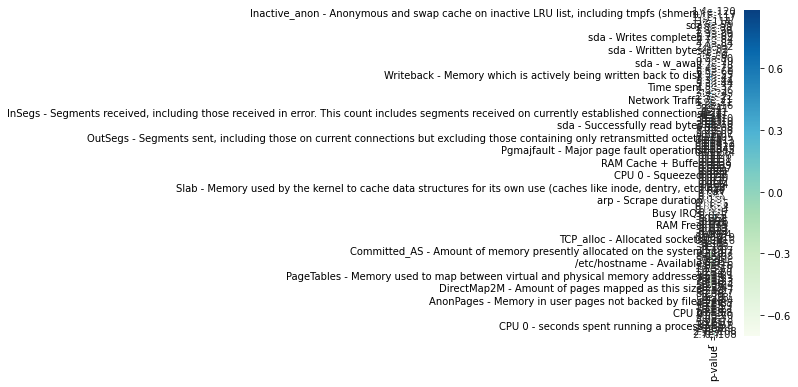

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(txn_falure_correlation, cmap='GnBu', square=True, annot=True, linewidths=.5)
         

<AxesSubplot:>

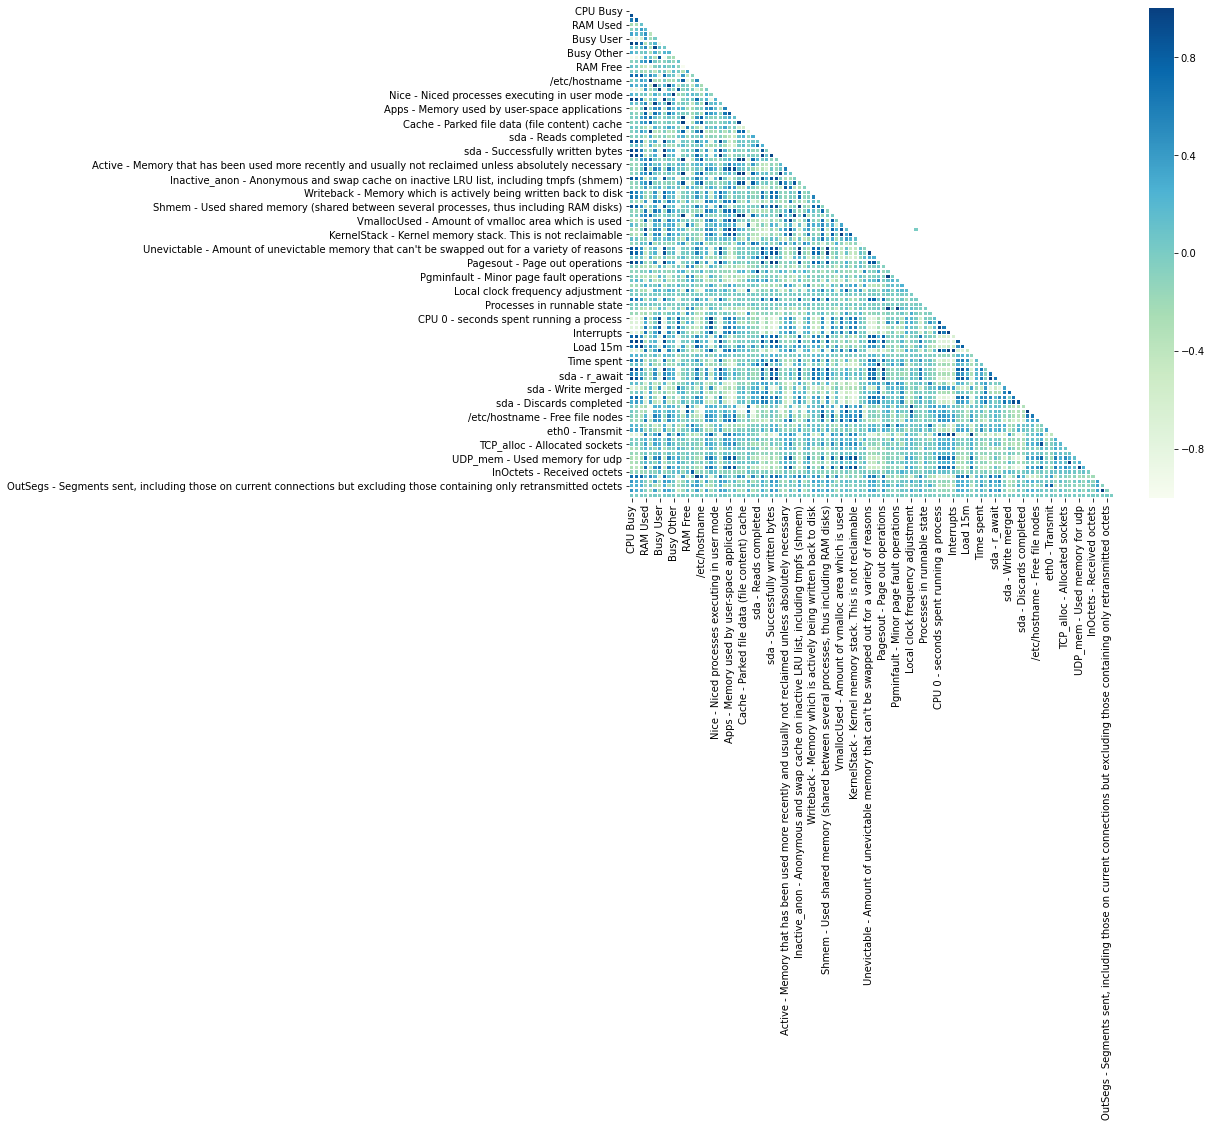

In [17]:
correlations = X.corr().dropna(axis=1, how='all').T.dropna(axis=1, how='all').T
# heatmap

matrix = np.triu(correlations)

plt.figure(figsize=(11,9))
sns.heatmap(correlations, cmap='GnBu', square=True, annot=False, linewidths=.5, mask=matrix)
#plt.savefig('xx.png')